In [338]:
import pandas as pd  
import numpy as np  
import matplotlib as plt  
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as ssw
from scipy.stats import norm

# Loading the data 

In [38]:
df = pd.read_csv('C:/Users/yashb/Downloads/hotel_bookings.csv')

In [39]:
df1 = df.copy()

# Checking the Data 

In [41]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [43]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# finding missing values

In [45]:
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Handaling null values

1 the country has 488 missing values we can replace with the mode of that col 

In [48]:
df1.country.mode()

0    PRT
Name: country, dtype: object

In [49]:
df1.country = df1['country'].fillna('PRT')

In [50]:
df1.country.isna().value_counts()

country
False    119390
Name: count, dtype: int64

2 . droping the agent column 

In [52]:
df1 = df1.drop(['agent'],axis= 1)

In [53]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [54]:
df1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
company                           112593
days_in_waiting_

 same deleting the company col as there are many missing values

In [56]:
df1 = df1.drop(['company'],axis= 1)

In [57]:
df1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

removing null values from children and replacing it by median

In [59]:
df1.children = df1.children.fillna(df1.children.median())

In [60]:
df1.children.isna().value_counts()

children
False    119390
Name: count, dtype: int64

In [61]:
df1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

no missing values are there now 

# finding duplicates and removing it 

In [64]:
df1.duplicated().sum()

32039

so there are 32039 duplicate values so we have to remove it 

In [ ]:
df1.drop_duplicates(inplace= True)

In [ ]:
df1.duplicated().sum()

# removing outliers

In [287]:
# --- 3. Outlier Removal specifically for 'adr' using IQR Method ---

# Calculate Q1, Q3, and IQR for 'adr'
Q1_adr = df1['adr'].quantile(0.25)
Q3_adr = df1['adr'].quantile(0.75)
IQR_adr = Q3_adr - Q1_adr

# Calculate lower and upper bounds for outlier detection
# Values outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR] will be considered outliers
lower_bound_adr = Q1_adr - 1.5 * IQR_adr
upper_bound_adr = Q3_adr + 1.5 * IQR_adr


outliers_adr = df1[(df1['adr'] < lower_bound_adr) | (df1['adr'] > upper_bound_adr)]
num_outliers_adr = len(outliers_adr)
percentage_outliers_adr = (num_outliers_adr / len(df1)) * 100

# Remove the rows identified as outliers in 'adr'
df1 = df1[(df1['adr'] >= lower_bound_adr) & (df1['adr'] <= upper_bound_adr)].copy()


so we have handle the null values and also deleted the duplicated values 

so our data is cleaned now 

# 📊 Exploratory Data Analysis

Univariate and bivariate and multivariate analysis using relevant plots, Time-series analysis of booking trends. Guest demographics and distribution by country. Market segment share and ADR (Average Daily Rate) comparison. Booking lead time distribution across customer types

# Univariate

Text(0, 0.5, 'Frequency')

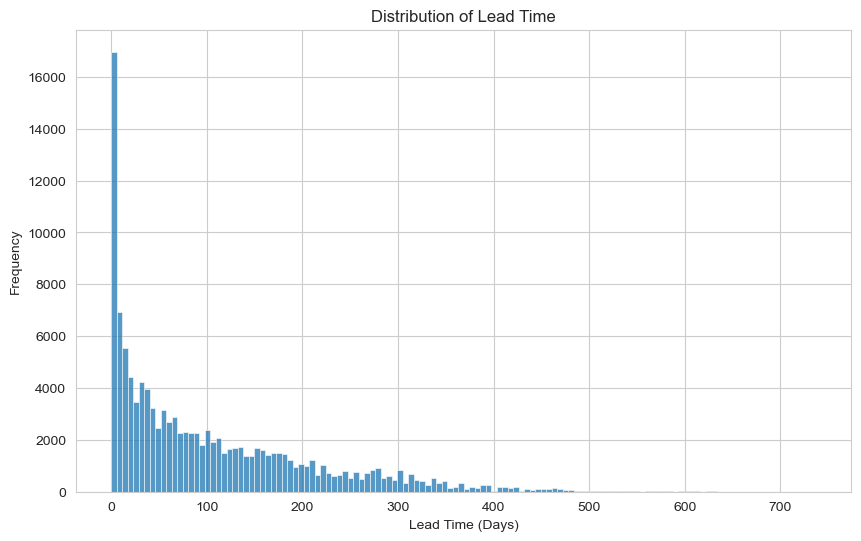

In [192]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='lead_time')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')

he distribution is heavily skewed to the right, indicating that most bookings are made with a relatively closer to the arrival date.

A significant peak appears at lead times close to 0, suggesting many last-minute or same-day bookings.

In [149]:
df1['total_nights_stays'] = df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

Text(0, 0.5, 'Count of Bookings')

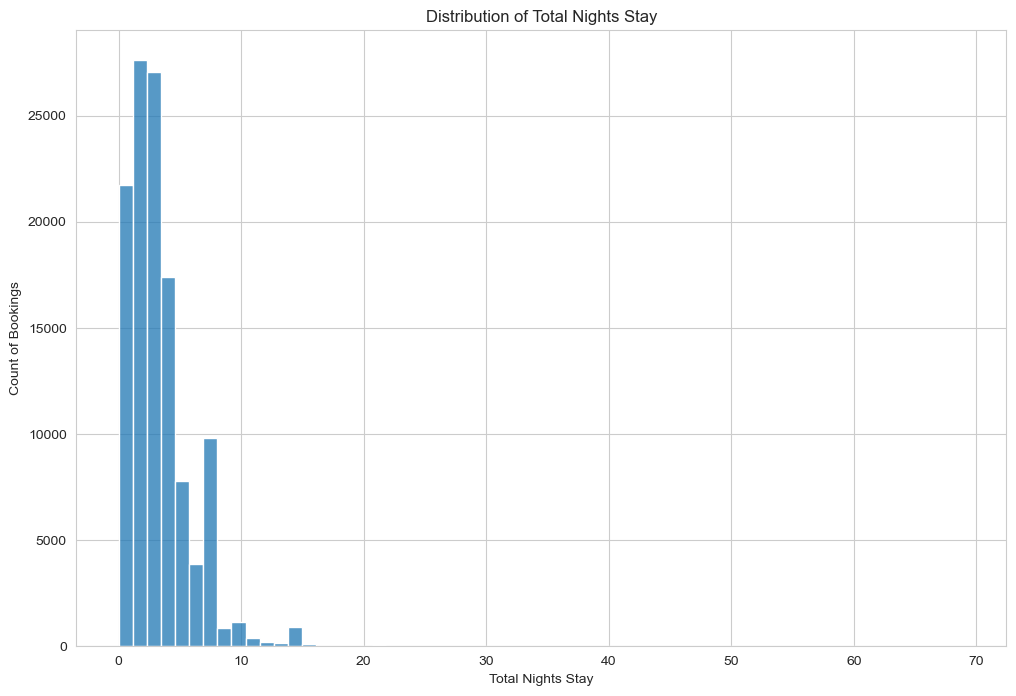

In [169]:
plt.figure(figsize=(12, 8))
sns.histplot(df1['total_nights_stays'], bins= 60) 
plt.title('Distribution of Total Nights Stay')
plt.xlabel('Total Nights Stay')
plt.ylabel('Count of Bookings')


1) Key findings from this graph
2) The most common stay duration is between 1 and 7 nights, with a sharp decline after 7 nights.
3) Stays of 1-3 nights are particularly prevalent, forming the highest peaks.
4) Very long stays (e.g., more than 15-20 nights) are rare, as indicated by the long tail to the right."

In [183]:
df1.adr.value_counts()

adr
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8879, dtype: int64

Text(0, 0.5, 'Count of Bookings')

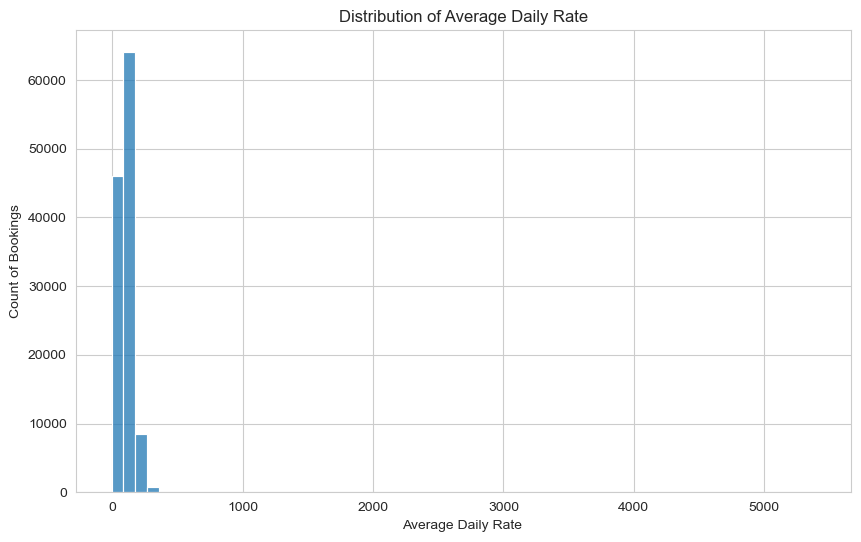

In [180]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['adr'], bins=60) 
plt.title('Distribution of Average Daily Rate')
plt.xlabel('Average Daily Rate ')
plt.ylabel('Count of Bookings')

The adr distribution is generally right-skewed, with a concentration of bookings having adr values around 0− 100 dollars


In [188]:
df1['total_guest'] = df1['adults']+df1['children'] + df1['babies']

<Axes: xlabel='total_guest', ylabel='Count'>

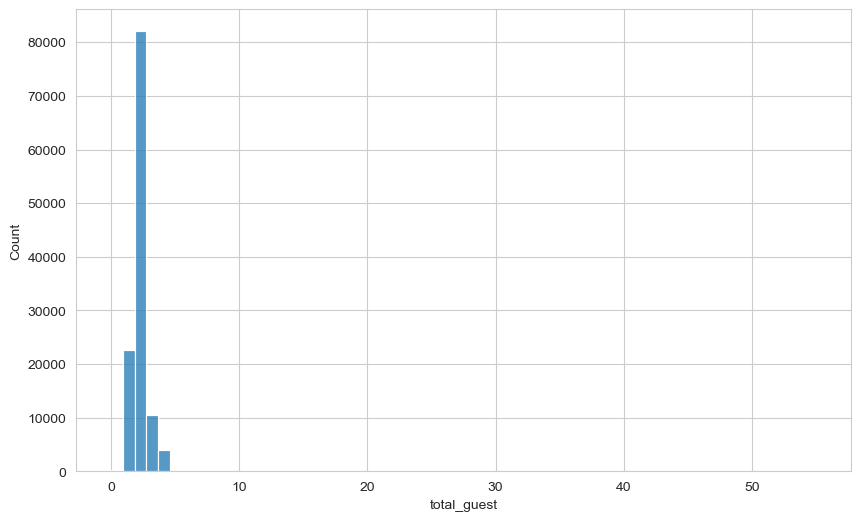

In [198]:
plt.figure(figsize=(10,6)) 
sns.histplot(df1['total_guest'],bins= 60)

The majority of bookings are for 2 guests .

Bookings for 1 guest are also common.

Bookings for larger groups are less frequent.

<Axes: xlabel='days_in_waiting_list', ylabel='Count'>

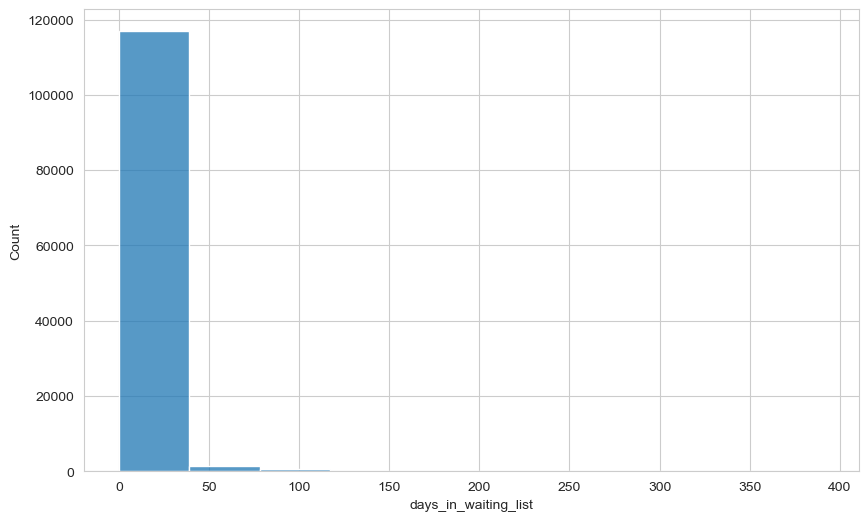

In [206]:
plt.figure(figsize=(10,6)) 
sns.histplot(df1['days_in_waiting_list'],bins= 10)

A vast majority of bookings spend 0 days in the waiting list, indicating immediate confirmation for most.

Only a small fraction of bookings experienced any waiting time.


C:\Users\yashb\AppData\Local\Temp\ipykernel_21084\2262454846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(  df1['hotel'],palette='plasma', errorbar=None)


<Axes: ylabel='hotel'>

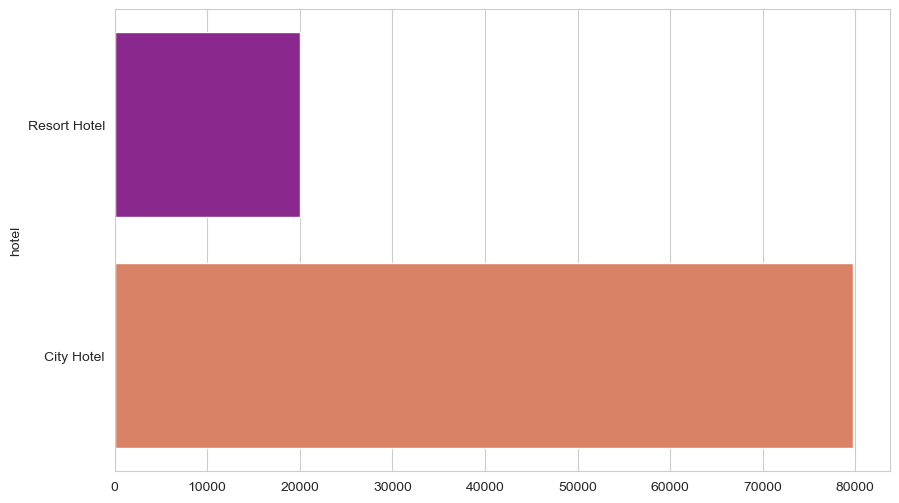

In [241]:
plt.figure(figsize=(10,6)) 
sns.barplot(  df1['hotel'],palette='plasma', errorbar=None) 

The City Hotel generally has a higher average adr compared to the Resort Hotel. This could be due to city hotels catering to business travelers, offering more premium services, or being in higher demand areas.

C:\Users\yashb\AppData\Local\Temp\ipykernel_21084\2377530977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')


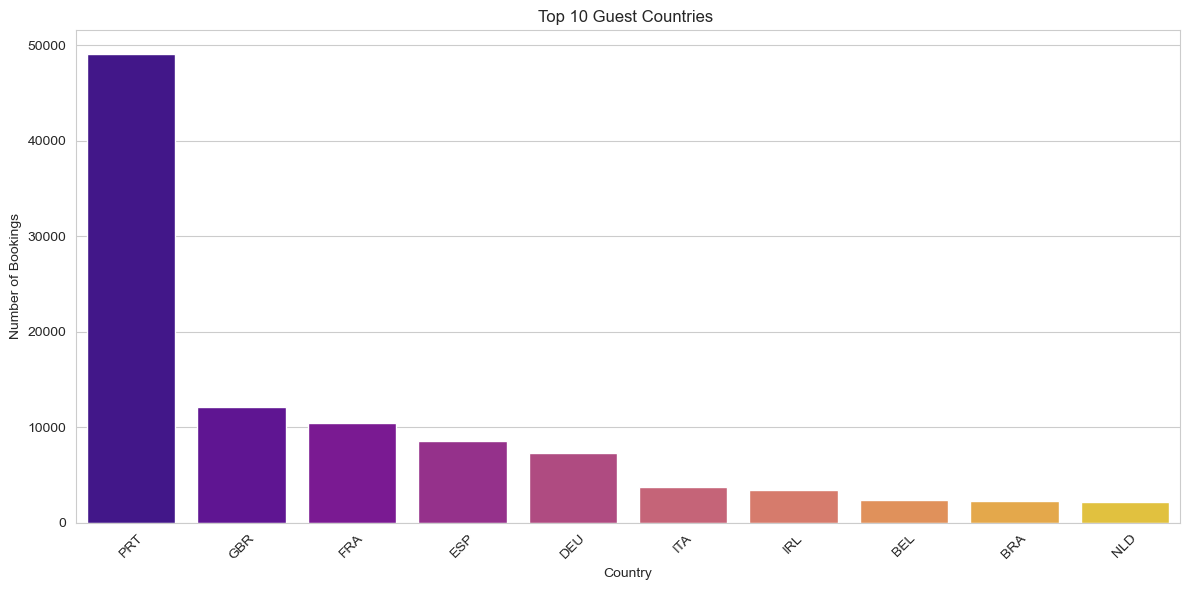

In [250]:
plt.figure(figsize=(12, 6))
top_countries = df1['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='plasma')
plt.title('Top 10 Guest Countries ')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

the no of booking in the PTR is the highest followed by GBR and FRA

C:\Users\yashb\AppData\Local\Temp\ipykernel_21084\3440464863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1['meal'].value_counts().index, y=df1['meal'].value_counts().values, palette='plasma', errorbar=None)


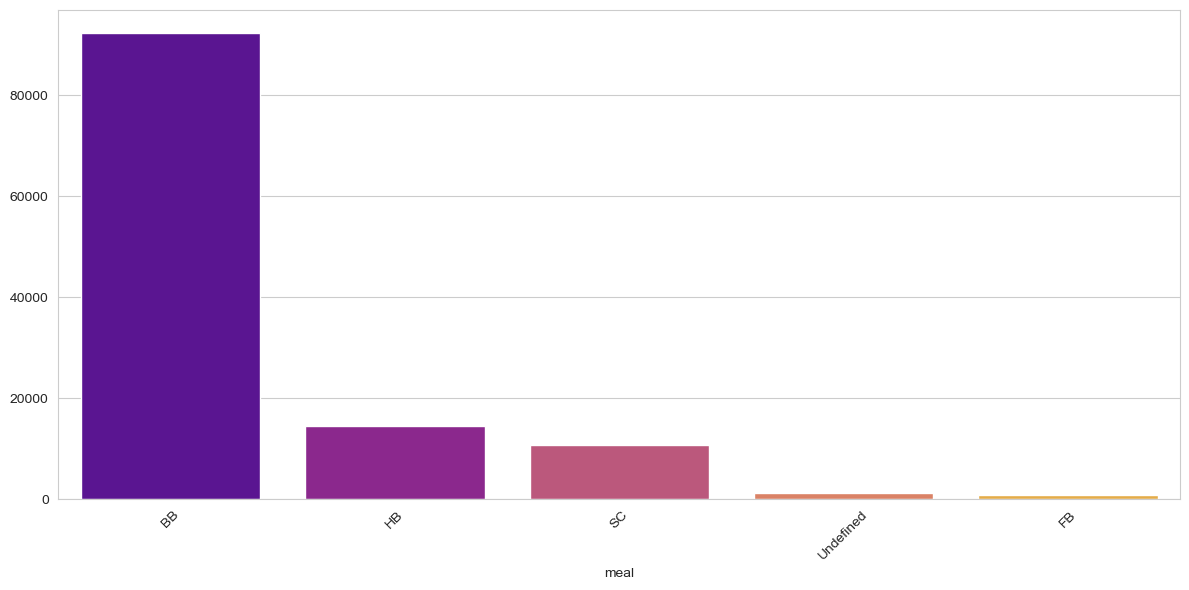

In [274]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df1['meal'].value_counts().index, y=df1['meal'].value_counts().values, palette='plasma', errorbar=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"BB" (Bed & Breakfast) is by far the most popular meal plan.

"SC" (Self-Catering) is the second most common, with "HB" (Half Board) and "FB" (Full Board) being much less common

# bivarient

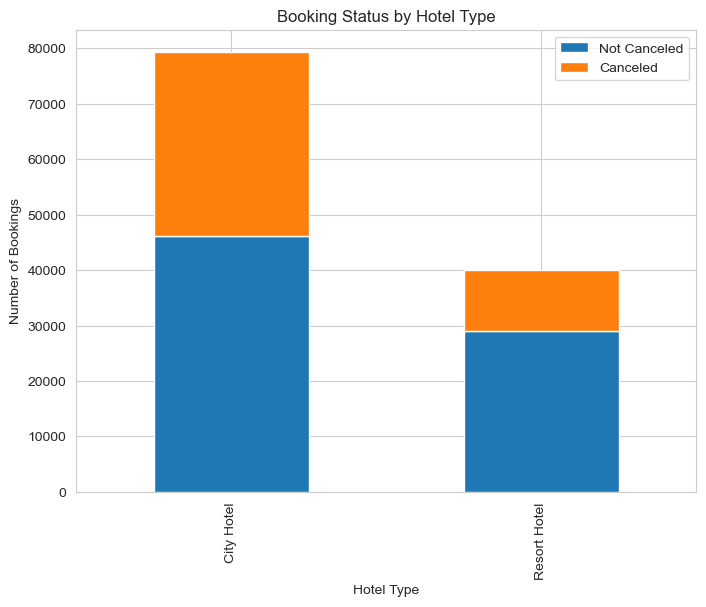

In [276]:
a = df1.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)
a.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Booking Status by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(['Not Canceled', 'Canceled'])

the barplot show that the no of booking is more in city hotel than reaort hotle 

also it shows that the rate of cancellation in City hotel is more than Resort Hotel

In [109]:
date_df = df1.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='count')
date_df

,arrival_date_year,arrival_date_month,count
0,2015,August,3889
1,2015,December,2920
2,2015,July,2776
3,2015,November,2340
4,2015,October,4957
5,2015,September,5114
6,2016,April,5428
7,2016,August,5063
8,2016,December,3860
9,2016,February,3891


<Axes: xlabel='arrival_date_month', ylabel='count'>

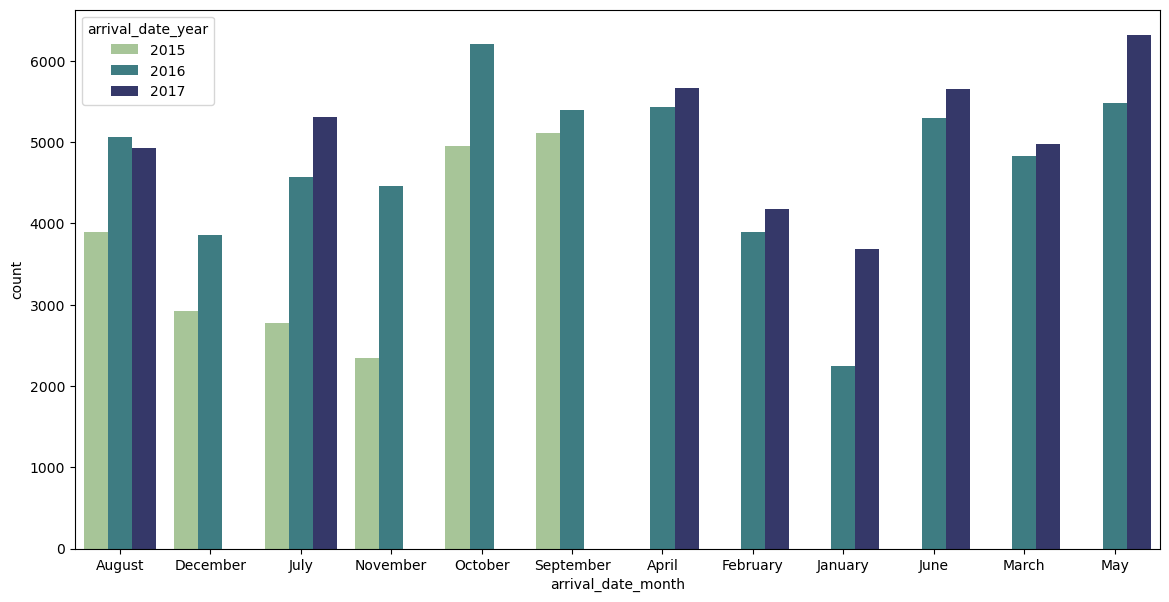

In [111]:
plt.figure(figsize=(14, 7))
sns.barplot(data=date_df, x='arrival_date_month', y='count', hue='arrival_date_year', palette= 'crest')  

1)the graph shows that there is data avilable for 2015 and 2017 there are some missing months data

2 ) comparing the available data we can say that the growth was significant from 2016 as compared to  2015 

3 ) the growth was there in 2017 but not significant as it was before 


In [123]:
a = df1.arrival_date_month.where(df1['arrival_date_year']==2016).value_counts()
a

arrival_date_month
October      6203
May          5478
April        5428
September    5394
June         5292
August       5063
March        4824
July         4572
November     4454
February     3891
December     3860
January      2248
Name: count, dtype: int64

C:\Users\yashb\AppData\Local\Temp\ipykernel_21084\3575924310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=a,palette= 'plasma')


<Axes: title={'center': 'Arrival Month'}, xlabel='Arrival Month', ylabel='Counts'>

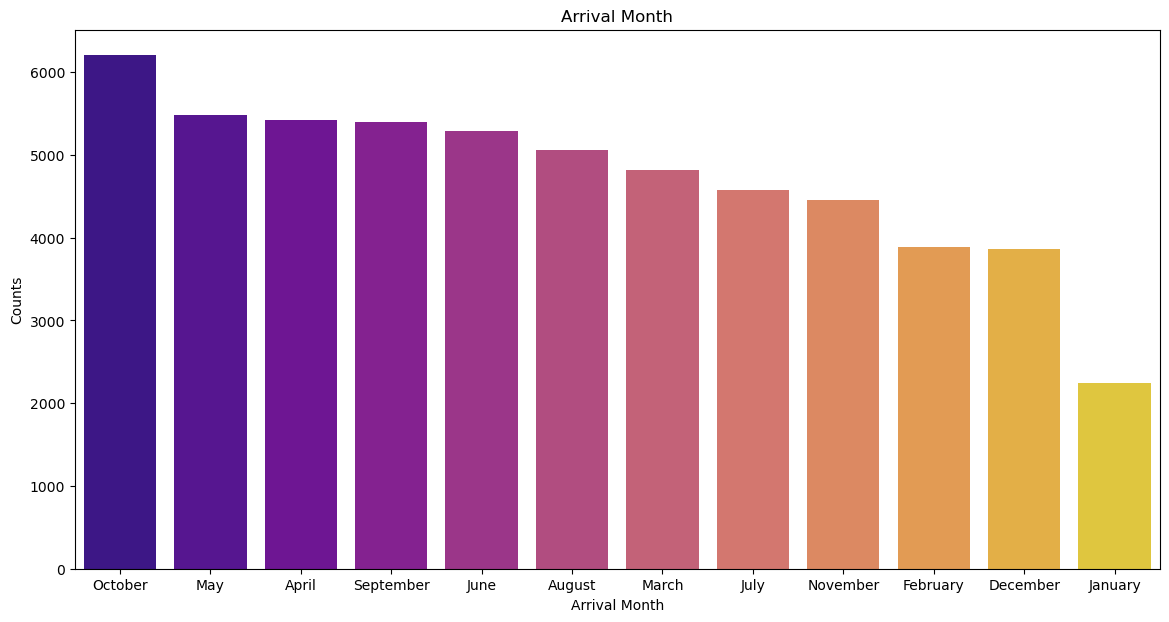

In [129]:
plt.figure(figsize=(14, 7))
plt.xlabel('Arrival Month')
plt.ylabel('Counts')
plt.title('Arrival Month')
sns.barplot(data=a,palette= 'plasma')  

1 ) here we have taken 2016 data as it has all 12 months included

2 ) we find that the month of October is the peak season with highest counts of arriving guest

3 ) The month of January has the least no of the visitors

C:\Users\yashb\AppData\Local\Temp\ipykernel_21084\4205897431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_type', y='adr', data=df1, palette='pastel')


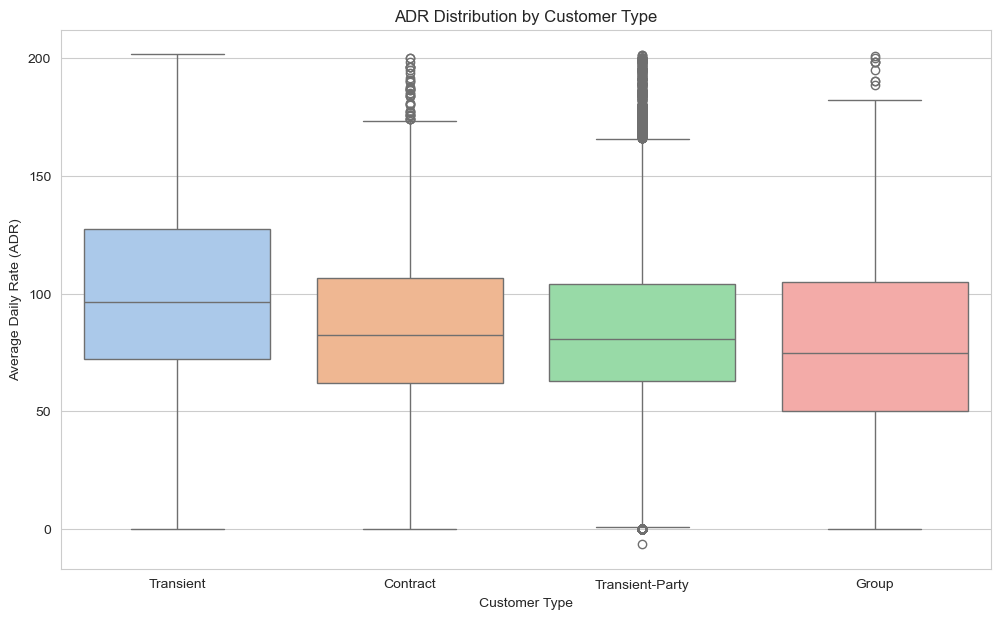

In [293]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='customer_type', y='adr', data=df1, palette='pastel')
plt.title('ADR Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

Contract and Transient customer types show a similar median adr and interquartile range.

Group customers also tend to have a lower adr compared to transient bookings, as group bookings often come with discounts

grouping all the date month and year in datetime format

In [418]:
df1['arrival_date'] = pd.to_datetime(
    df1['arrival_date_year'].astype(str) + '-' +
    df1['arrival_date_month'] + '-' +
    df1['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

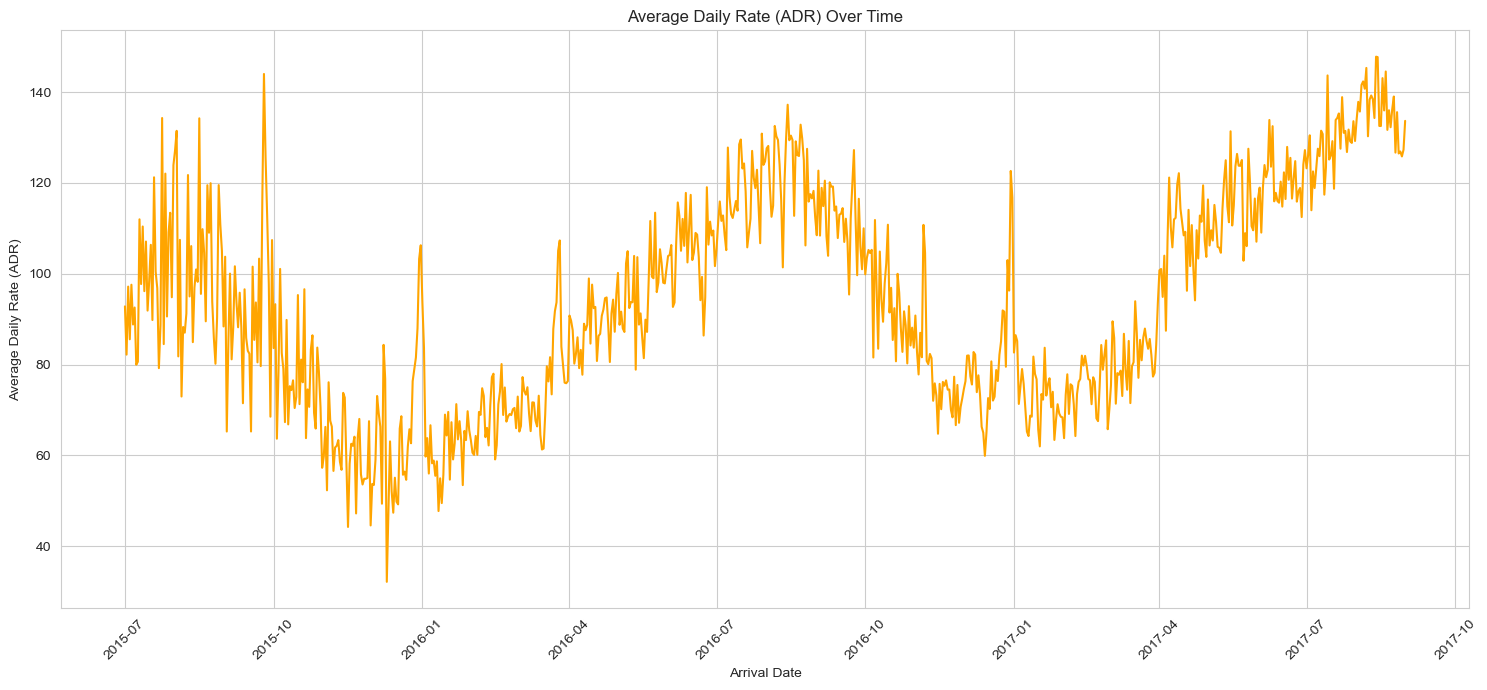

In [420]:
adr_over_time = df1.groupby('arrival_date')['adr'].mean().reset_index(name='average_adr')

plt.figure(figsize=(15, 7))
sns.lineplot(x='arrival_date', y='average_adr', data=adr_over_time, color='orange')
plt.title('Average Daily Rate (ADR) Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

There is a clear seasonal pattern in total bookings, with peaks and troughs corresponding to different times of the year.

C:\Users\yashb\AppData\Local\Temp\ipykernel_21084\148662007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


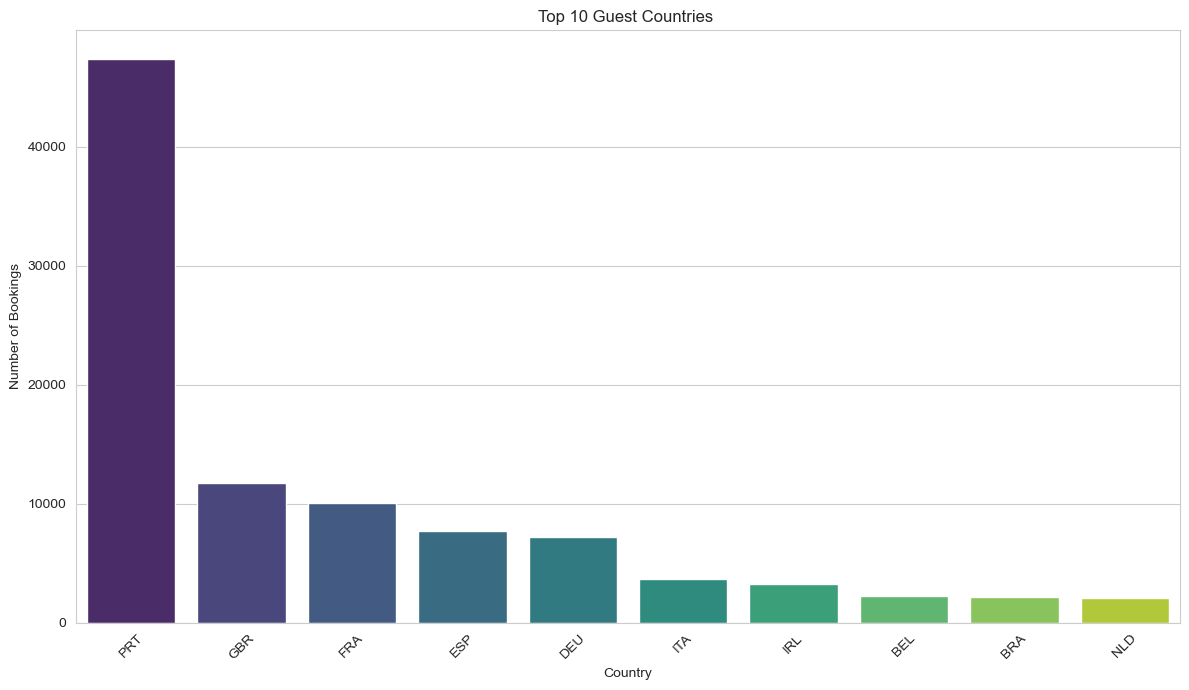

In [423]:
plt.figure(figsize=(12, 7))
top_countries = df1['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Guest Countries ')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 reserved room type

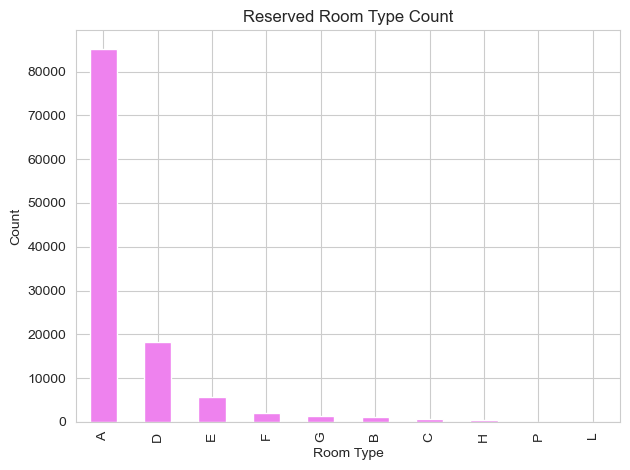

In [427]:
df1['reserved_room_type'].value_counts().plot(kind='bar', title='Reserved Room Type Count', color='violet')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

ADR vs Market Segment

C:\Users\yashb\AppData\Local\Temp\ipykernel_21084\1962288036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='adr',errorbar=None, data=df,palette= 'plasma')


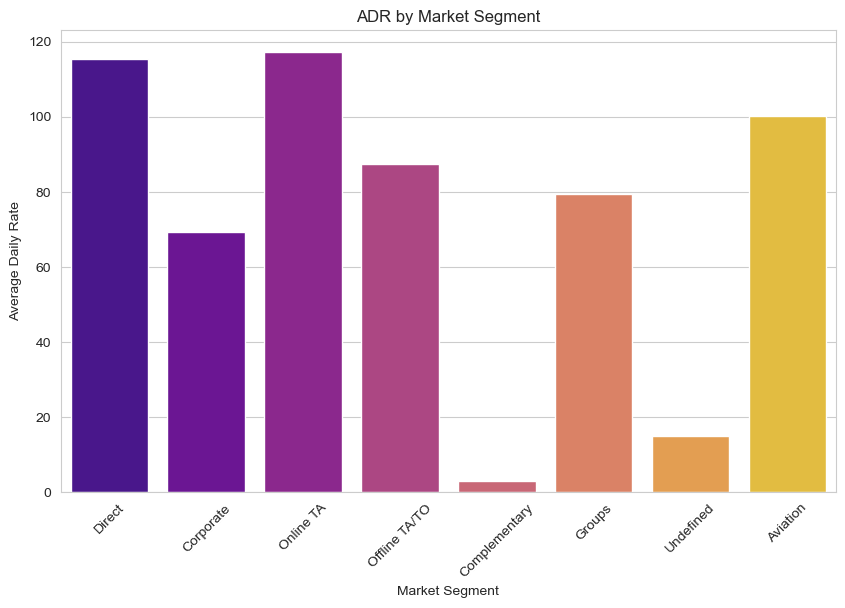

In [322]:

plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='adr',errorbar=None, data=df,palette= 'plasma')
plt.title('ADR by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.show()

Count of Market Segments

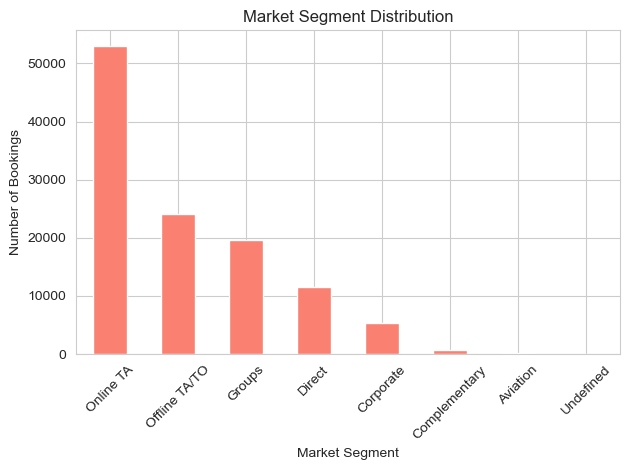

In [429]:
df1['market_segment'].value_counts().plot(kind='bar', title='Market Segment Distribution', color='salmon')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Segmentation by Market Segment

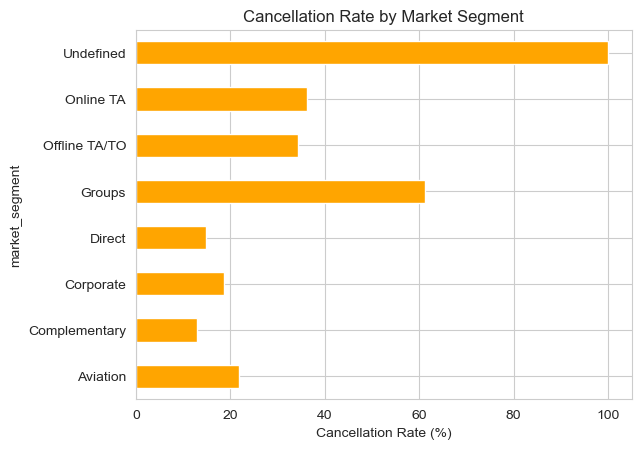

In [433]:
cancel_by_segment = df1.groupby('market_segment')['is_canceled'].mean() * 100
cancel_by_segment.plot(kind='barh', title='Cancellation Rate by Market Segment', color='orange')
plt.xlabel('Cancellation Rate (%)')
plt.show()

Group by Segment & ADR (Revenue Insight)

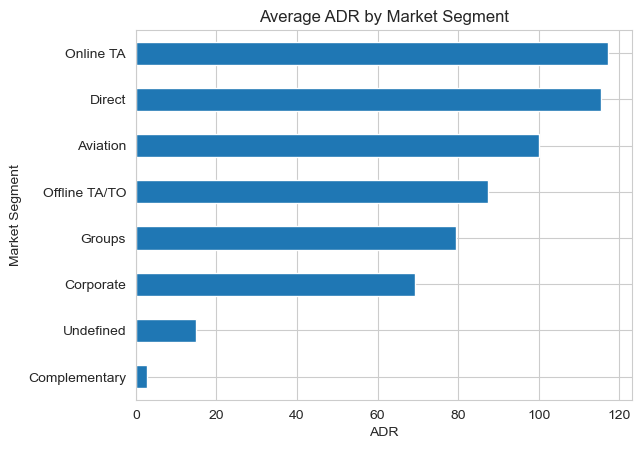

In [435]:
segment_adr = df.groupby('market_segment')['adr'].mean().sort_values()
segment_adr.plot(kind='barh', title='Average ADR by Market Segment')
plt.xlabel('ADR')
plt.ylabel('Market Segment')
plt.show()

# Correlation Analysis

List of numerical columns used for analysis or visualization

In [462]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Drop ID columns that are not truly numerical measures for correlation
numeric_df = numeric_df.drop(columns=['index', 'is_canceled', 'arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights'], errors='ignore')


Visualize correlations using heatmaps

<Axes: >

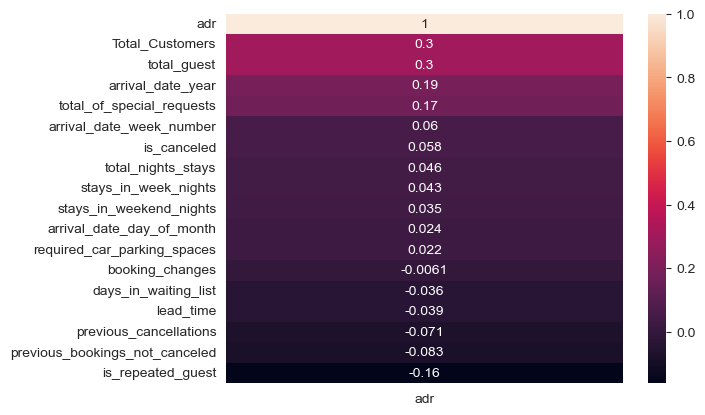

In [468]:
corr_matrix = df1.corr(numeric_only=True)
sns.heatmap(corr_matrix[['adr']].sort_values(by='adr', ascending=False), annot=True)

Calculate the Pearson correlation coefficient between 'adr' and 'lead_time'

In [488]:

np.corrcoef(df1['adr'], df1['lead_time'])

array([[ 1.        , -0.03927119],
       [-0.03927119,  1.        ]])

Calculate the Pearson correlation coefficient between 'adr' and 'total_of_special_requests'

In [490]:
np.corrcoef(df1['adr'], df1['total_of_special_requests'])

array([[1.       , 0.1742765],
       [0.1742765, 1.       ]])

Calculate the Pearson correlation coefficient between 'adr' and 'booking_changes'

In [492]:
np.corrcoef(df1['adr'], df1['booking_changes'])

array([[ 1.        , -0.00608016],
       [-0.00608016,  1.        ]])

Correlation analysis shows that ADR is weakly influenced by the number of special requests, while lead time and booking changes have almost negligible impact on ADR. This indicates that price variation may be more influenced by other factors like market segment, room type, or hotel type, and not just booking behavior.

# Hypothesis Testing

Ho: No difference in ADR between Online TA and Direct

In [494]:
online_ta_adr = df1[df1['distribution_channel'] == 'TA/TO']['adr']
direct_adr = df1[df1['distribution_channel'] == 'Direct']['adr']
ssw.ztest(online_ta_adr, direct_adr, value = 0)

(8.748140218045588, 2.1689765293520703e-18)

2. Ho: Room upgrades are independent of lead time

In [484]:
df1['is_upgraded'] = (df1['reserved_room_type'] != df1['assigned_room_type']).astype(int)
ssw.ztest(df1[df1['is_upgraded'] == 1]['lead_time'], df1[df1['is_upgraded'] == 0]['lead_time'], value = 0)

(-50.042456210798925, 0.0)

3. H0: Average stay duration does not differ between customer type

In [486]:
mod1 = ols('total_guest ~ customer_type', data = df1).fit()
tb1 = sm.stats.anova_lm(mod1)
tb1

,df,sum_sq,mean_sq,F,PR(>F)
customer_type,3.0,1075.154614,358.384871,777.924816,0.0
Residual,114561.0,52777.502917,0.460693,NaN,NaN


# 5.  Key Business Questions


In [361]:
#1 What influences ADR the most?
df1['Total_Customers']=df1['adults']+df1['children']+df1['babies']


In [363]:
##Dropping columns as we have total customers column
df1.drop(['adults','children','babies'],axis=1,inplace=True)

<Axes: >

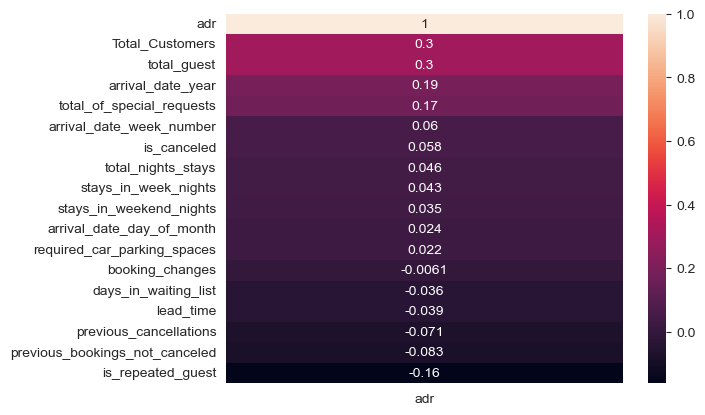

In [466]:
#Plotting correlation matrix for numeric columns only
corr_matrix = df1.corr(numeric_only=True)
sns.heatmap(corr_matrix[['adr']].sort_values(by='adr', ascending=False), annot=True)


In [367]:
#2. Do guests who book earlier tend to request more changes?
corr_lead_changes = df1['lead_time'].corr(df1['booking_changes'])

In [369]:
corr_lead_changes

-0.001054305141525522

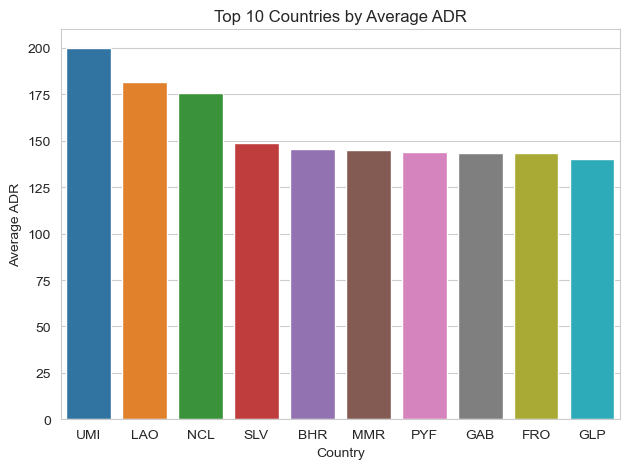

In [371]:
#3 Are there pricing or booking differences across countries?

adr_by_country = df1.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=adr_by_country.index, y=adr_by_country.values, hue=adr_by_country.index, legend=False)
plt.title('Top 10 Countries by Average ADR')
plt.xlabel('Country')
plt.ylabel('Average ADR')
plt.tight_layout()
plt.show()

<Axes: xlabel='room_reassigned'>

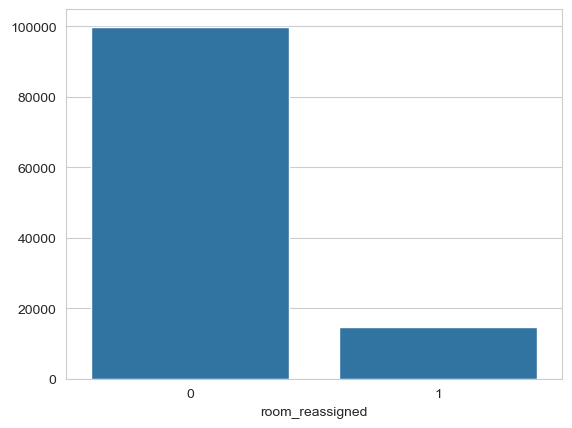

In [375]:
#4 Is there a pattern in room upgrades or reassignment?

room_reassigned_count = df2['room_reassigned'].value_counts()
sns.barplot(x=room_reassigned_count.index, y=room_reassigned_count.values)


In [379]:
#5 Are reserved room types consistently matched with assigned room types?
df_rooms_not_upgraded=df1[df2['room_reassigned'] == 0] 

In [383]:
#6 What are the most common guest demographics (e.g., group size, nationality)?
print(f"\nMost common group size (total guests): {df1['Total_Customers'].mode()[0]}")
print(f"Most common nationality: {df1['country'].mode()[0]}")


Most common group size (total guests): 2.0
Most common nationality: PRT


Text(0, 0.5, 'Count')

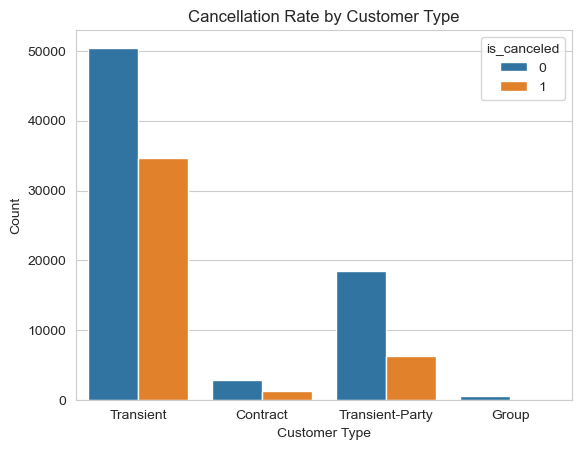

In [385]:
#7 Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior?

sns.countplot(x='customer_type', hue='is_canceled', data=df1)
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')

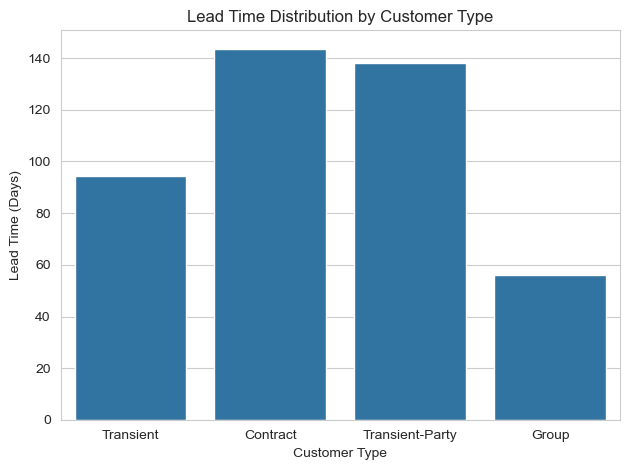

In [387]:
#8 How does booking lead time vary across customer types and countries?

sns.barplot(x='customer_type', y='lead_time', data=df1,errorbar= None)
plt.title('Lead Time Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time (Days)')
plt.tight_layout()
plt.show()

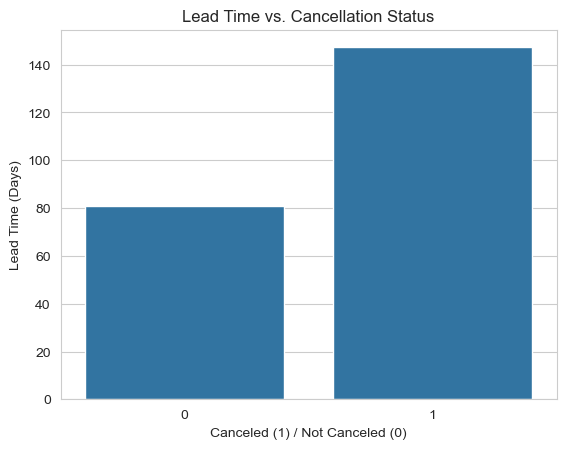

In [391]:
# 9 Are longer lead times associated with fewer booking changes or cancellations?
sns.barplot(x='is_canceled', y='lead_time', data=df1,errorbar=None)
plt.title('Lead Time vs. Cancellation Status')
plt.xlabel('Canceled (1) / Not Canceled (0)')
plt.ylabel('Lead Time (Days)')
plt.show()

In [510]:
# What is the typical duration of stay, and how does it vary by customer type or segment?

stay_by_customer_type = df1.groupby('customer_type')['total_guest'].mean().sort_values(ascending=False)
stay_by_market_segment = df1.groupby('market_segment')['total_guest'].mean().sort_values(ascending=False)
stay_by_customer_type, stay_by_market_segment

(customer_type
 Group              2.416370
 Contract           1.987913
 Transient          1.974575
 Transient-Party    1.754991
 Name: total_guest, dtype: float64,
 market_segment
 Undefined        2.500000
 Online TA        2.076247
 Direct           2.000087
 Offline TA/TO    1.848879
 Groups           1.799827
 Complementary    1.597577
 Corporate        1.247210
 Aviation         1.004219
 Name: total_guest, dtype: float64)

In [512]:
#How often are guests upgraded or reassigned to a different room type?a
upgrade_distribution = df1['is_upgraded'].value_counts(normalize=True).rename({0: 'No Upgrade', 1: 'Upgraded'}) * 100
upgrade_distribution

is_upgraded
No Upgrade    87.222974
Upgraded      12.777026
Name: proportion, dtype: float64

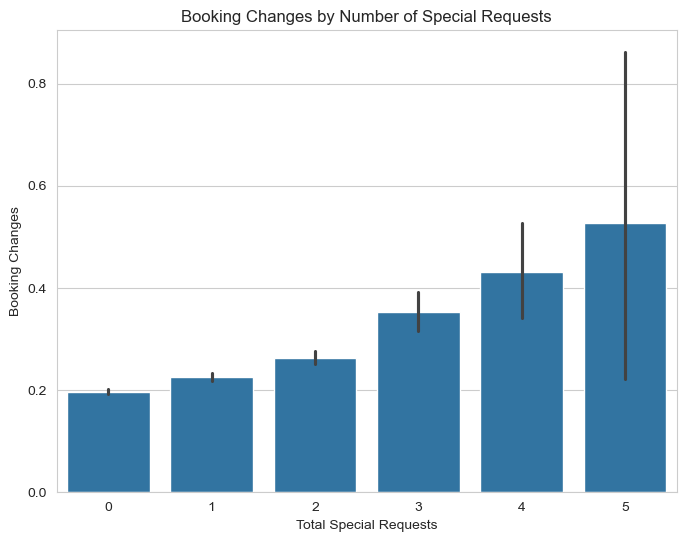

In [399]:
#12 Are guests who make special requests more likely to experience booking changes or longer stays?
plt.figure(figsize=(8, 6))
sns.barplot(x='total_of_special_requests', y='booking_changes', data=df1)
plt.title('Booking Changes by Number of Special Requests')
plt.xlabel('Total Special Requests')
plt.ylabel('Booking Changes')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Direct'),
  Text(4, 0, 'Groups'),
  Text(5, 0, 'Offline TA/TO'),
  Text(6, 0, 'Online TA'),
  Text(7, 0, 'Undefined')])

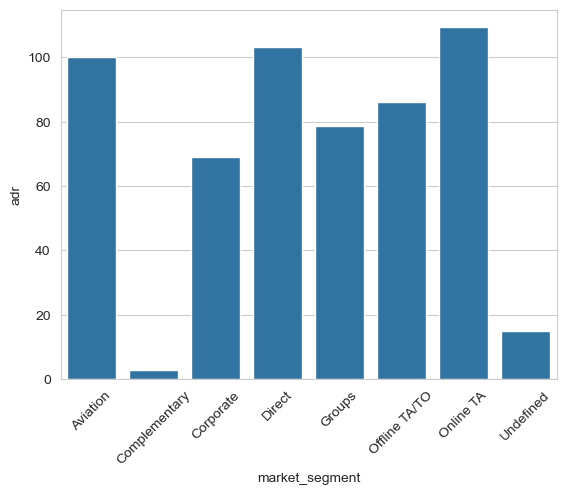

In [514]:
# Do certain market segments or distribution channels show higher booking consistency or revenue?
segment_stats = df1.groupby('market_segment')[['adr', 'is_canceled']].mean()
channel_stats = df1.groupby('distribution_channel')[['adr', 'is_canceled']].mean()
sns.barplot(x=segment_stats.index, y=segment_stats['adr']);
plt.xticks(rotation=45)

<Axes: >

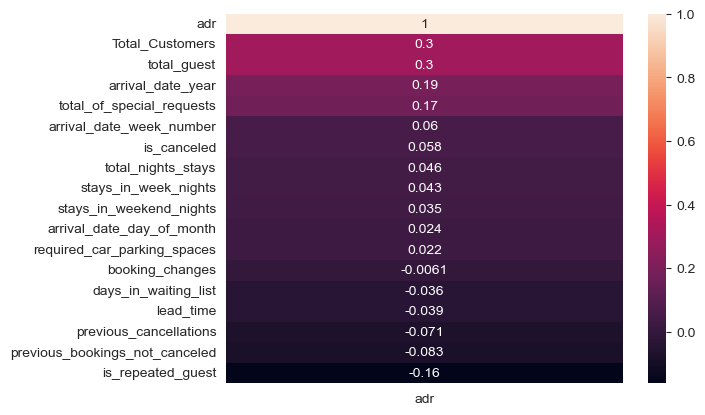

In [401]:
#14 What factors are most strongly associated with higher ADR?
corr_matrix = df1.corr(numeric_only=True)
sns.heatmap(corr_matrix[['adr']].sort_values(by='adr', ascending=False), annot=True)

In [526]:
#Q 15
df1['lead_time_bucket'] = pd.cut(df1['lead_time'], bins=[0, 30, 90, 180, 365, df1['lead_time'].max()],
                                labels=['0–30d', '31–90d', '91–180d', '181–365d', '365+d'])
adr_by_lead_time = df1.groupby('lead_time_bucket', observed=True)['adr'].mean()
adr_by_lead_time

lead_time_bucket
0–30d        94.717541
31–90d       99.362534
91–180d     103.274340
181–365d     92.362474
365+d        78.639412
Name: adr, dtype: float64

In [528]:
#Are guests with higher ADR more likely to request special services or make booking modifications?
np.corrcoef(df1.adr, df1.total_of_special_requests), np.corrcoef(df1.adr, df1.booking_changes)

(array([[1.       , 0.1742765],
        [0.1742765, 1.       ]]),
 array([[ 1.        , -0.00608016],
        [-0.00608016,  1.        ]]))

In [ ]:

country_behavior = df.groupby('country')[['lead_time', 'total_stay']].mean().sort_values(by='lead_time', ascending=False)
country_behavior.head(10)